In [3]:
import pandas as pd
from datetime import datetime
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
SPY_data = pd.read_csv('../data/advanced/SPY_regression.csv')
SPY_data.set_index('Date',inplace=True)
SPY_data

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883
...,...,...,...,...,...,...
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,4.389590e+09,1144.979980
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,5.270680e+09,1141.689941
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,4.972660e+09,1137.140015


In [5]:
SPY_data.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1493.000000,1493.000000,1493.000000,1493.000000,1.493000e+03,1493.000000
mean,1564.805712,1573.101540,1556.045962,1565.370924,3.778865e+09,1565.370924
std,344.474195,344.719565,344.233831,344.453792,8.865364e+08,344.453792
min,1027.650024,1032.949951,1010.909973,1022.580017,5.362000e+08,1022.580017
25%,1277.030029,1283.930054,1267.400024,1277.300049,3.252780e+09,1277.300049
50%,1459.369995,1462.430054,1452.060059,1459.369995,3.673450e+09,1459.369995
75%,1911.770020,1927.209961,1902.010010,1913.849976,4.214910e+09,1913.849976
max,2130.360107,2134.719971,2126.060059,2130.820068,1.061781e+10,2130.820068


# Feature Engineering
## 1. High – Low percent change

In [6]:
# (current - prior)/prior
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()

,Open,High,Low,Close,Volume,Adj Close,High-Low_pct
Date,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,0.802043
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,0.001172
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,-0.363191
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,-0.247413
2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,-0.344421
2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,-0.316414
2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,-0.268577
2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2.556754


first = (2090.419922 -	2066.780029)
second = (2093.840088 -	2051.239990)
print(f'First : {first}, Second : {second}, Change : {(second-first)/first}')


## 2. 5 periods Exponential Moving Average

In [5]:
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)

## 3. Standard deviation of the price over the past 5 days

In [7]:
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)

## 4. Daily volume percent change

In [8]:
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()

## 5. Average volume for the past 5 days

In [9]:
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)

## 6. Volume over close price ratio

In [10]:
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

In [13]:
SPY_data.head(10)

,Open,High,Low,Close,Volume,Adj Close,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,4.043820e+09,2077.070068,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,4.214910e+09,2091.689941,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,4.306490e+09,2049.620117,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,3.950640e+09,2079.510010,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,3.712120e+09,2102.629883,2073.181111,NaN,-0.060375,NaN,NaN
2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,4.245030e+09,2080.409912,2084.486090,NaN,0.143559,4.045596e+09,2.328943e+08
2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,1.466840e+09,2090.110107,2082.996599,NaN,-0.654457,4.085838e+09,2.493154e+08
2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2.852940e+09,2088.870117,2085.515175,NaN,0.944957,3.536224e+09,1.181180e+09
2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,3.884930e+09,2089.139893,2086.678895,NaN,0.361729,3.245514e+09,1.121578e+09


# Visualize the correlation between the features and target variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

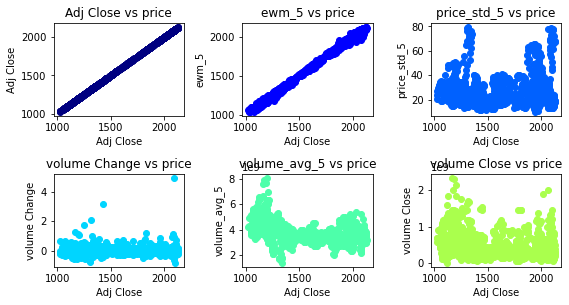

In [15]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()
    
# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]
correlation(SPY_data,variables,3,3);

In [17]:
SPY_data.corr()['Adj Close'].loc[variables]

Adj Close        1.000000
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64